In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import matplotlib

In [2]:
skin=pd.read_csv("dataset_35_dermatology.csv")

In [3]:
skin.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

1 psoriasis 112
2 seboreic dermatitis 61
3 lichen planus 72
4 pityriasis rosea 49
5 cronic dermatitis 52
6 pityriasis rubra pilaris 20

### Outliers Detecting and Treating

In [4]:
def outliers(data,col):
    out=[]
    data[col]=sorted(data[col])
    q1=np.percentile(data[col],25)
    q3=np.percentile(data[col],75)
    iqr=q3-q1
    lwr=q1-(1.5*iqr)
    upr=q3+(1.5*iqr)
    
    print("Column: " , col)
    print("The upper bound is: ",upr)
    print("The lower bound is: ",lwr)
    print("-"*50)
    print("The Length of Upper Limit is: ",len(data.loc[data[col] > upr]))
    print("The Length of Lower Limit is: ",len(data.loc[data[col] < lwr]))
    print("-"*50)
    print("Percentage of Outliers for Upper Limit: ",(len(data.loc[data[col] > upr]))/(data[col].shape[0])*100,"%")
    print("Percentage of Outliers for Lower Limit: ",(len(data.loc[data[col] < lwr]))/(data[col].shape[0])*100,"%")
    print("-"*50)
    print("The Outliers in the Upper Bound  are: \n",(pd.DataFrame(data.loc[data[col] > upr])))
    print("-"*50)
    print("The Outliers in the Lower Bound  are: \n",(pd.DataFrame(data.loc[data[col] < lwr])))
    print("-"*50)
    
    for i in data[col]:
        if i<lwr or i>upr:
            out.append(i)
    return out

In [5]:
skin['erythema'].value_counts()

2    215
3     90
1     57
0      4
Name: erythema, dtype: int64

In [6]:
skin['erythema'].unique()

array([2, 3, 1, 0], dtype=int64)

In [7]:
outliers(skin,'erythema')

Column:  erythema
The upper bound is:  2.0
The lower bound is:  2.0
--------------------------------------------------
The Length of Upper Limit is:  90
The Length of Lower Limit is:  61
--------------------------------------------------
Percentage of Outliers for Upper Limit:  24.59016393442623 %
Percentage of Outliers for Lower Limit:  16.666666666666664 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
      erythema  scaling  definite_borders  itching  koebner_phenomenon  \
276         3        2                 2        2                   0   
277         3        2                 2        1                   0   
278         3        2                 2        1                   0   
279         3        2                 1        0                   1   
280         3        2                 2        0                   1   
..        ...      ...               ...      ...                 ...   
361         3        1               

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [8]:
skin.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [9]:
skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [10]:
skin.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [11]:
(skin["Age"]=="?").value_counts()

False    358
True       8
Name: Age, dtype: int64

In [12]:
skin["Age"].replace("?",np.nan,inplace=True)

In [13]:
med=skin.Age.median()

In [14]:
skin["Age"]=skin["Age"].fillna(med)

In [15]:
skin["Age"]=skin["Age"].astype("int64")

In [16]:
skin.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [17]:
skin.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,0,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,0,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,0,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,0,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,1,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [18]:
X=skin.drop(["class"],axis=1)
y=skin["class"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [21]:
X_train.shape,y_train.shape

((292, 34), (292,))

In [22]:
X_test.shape,y_test.shape

((74, 34), (74,))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [27]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.126926,1.702723,0.485657,-0.320464,0.418600,-0.462915,-0.274868,-0.448236,1.320592,1.607887,...,-0.456585,-0.563574,-0.469825,-0.786638,-0.468265,-0.200227,-0.203898,-1.179088,-0.498832,0.350253
1,-0.126926,0.278095,0.485657,1.428611,-0.682582,-0.462915,-0.274868,-0.448236,1.320592,1.607887,...,-0.456585,1.675387,-0.469825,-0.786638,-0.468265,-0.200227,-0.203898,-1.179088,-0.498832,-0.775820
2,1.355574,-1.146532,-0.622249,-1.195002,0.418600,-0.462915,-0.274868,-0.448236,-0.646820,-0.586052,...,-0.456585,0.555907,-0.469825,1.926334,-0.468265,-0.200227,-0.203898,0.198087,-0.498832,-0.974539
3,1.355574,0.278095,0.485657,-1.195002,0.418600,-0.462915,-0.274868,-0.448236,1.320592,1.607887,...,-0.456585,1.675387,-0.469825,-0.786638,-0.468265,-0.200227,-0.203898,0.198087,-0.498832,0.681452
4,-0.126926,1.702723,1.593564,-1.195002,-0.682582,-0.462915,-0.274868,-0.448236,1.320592,2.704856,...,-0.456585,2.794868,-0.469825,-0.786638,-0.468265,-0.200227,-0.203898,1.575261,-0.498832,-0.643341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1.355574,1.702723,1.593564,-1.195002,-0.682582,-0.462915,-0.274868,-0.448236,0.336886,-0.586052,...,-0.456585,0.555907,-0.469825,-0.786638,-0.468265,-0.200227,-0.203898,0.198087,-0.498832,1.675046
288,-0.126926,0.278095,0.485657,0.554074,-0.682582,1.665766,-0.274868,-0.448236,-0.646820,-0.586052,...,1.882411,-0.563574,2.648106,-0.786638,1.668193,-0.200227,-0.203898,1.575261,2.232274,-0.775820
289,-0.126926,0.278095,1.593564,0.554074,1.519781,1.665766,-0.274868,3.256054,-0.646820,-0.586052,...,1.882411,-0.563574,2.648106,1.926334,1.668193,-0.200227,-0.203898,0.198087,1.321905,1.012650
290,-1.609427,-1.146532,-0.622249,-0.320464,-0.682582,-0.462915,3.547108,-0.448236,2.304298,1.607887,...,-0.456585,-0.563574,-0.469825,-0.786638,-0.468265,-0.200227,2.086034,-1.179088,0.411537,-1.636936


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
egc = ExtraTreesClassifier()
egc.fit(X_train,y_train)

ExtraTreesClassifier()

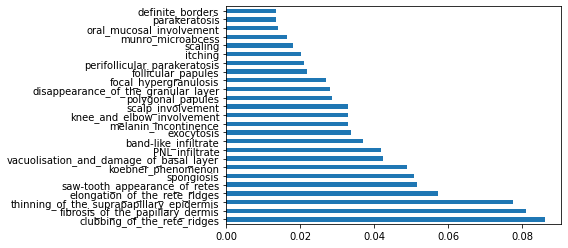

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(egc.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

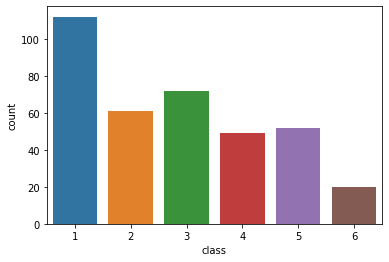

In [30]:
sns.countplot(x=skin["class"])

### Model Building

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,precision_score,recall_score,f1_score,classification_report

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier()

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rf=rf.predict(X_test)

In [36]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.9594594594594594

In [37]:
recall_score_rf=recall_score(y_test,y_pred_rf,average="weighted")
recall_score_rf

0.9594594594594594

In [38]:
precision_score_rf=precision_score(y_test,y_pred_rf,average="weighted")
precision_score_rf

0.9636786107374343

In [39]:
f1_score_rf=f1_score(y_test,y_pred_rf,average="weighted")
f1_score_rf

0.9583935721435721

In [40]:
y_pred_train_rf=rf.predict(X_train)

In [41]:
accuracy_train_rf=accuracy_score(y_train,y_pred_train_rf)
accuracy_train_rf

1.0

In [42]:
pd.crosstab(y_test,y_pred_rf)

col_0,1,2,3,4,5,6
class,,,,,,
1,15,0,0,0,0,0
2,0,13,0,1,0,0
3,0,0,16,0,0,0
4,0,0,0,12,0,0
5,0,0,0,0,9,0
6,2,0,0,0,0,6


In [43]:
reportrf=classification_report(y_test, y_pred_rf)# it will give precision,recall,f1 scores and accuracy  
print(reportrf)

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      0.75      0.86         8

    accuracy                           0.96        74
   macro avg       0.97      0.95      0.95        74
weighted avg       0.96      0.96      0.96        74



### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lg=LogisticRegression(multi_class='ovr')

In [46]:
lg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [47]:
y_pred_lg=lg.predict(X_test)

In [48]:
accuracy_lg=accuracy_score(y_test,y_pred_lg)
accuracy_lg

0.9864864864864865

In [49]:
recall_lg=recall_score(y_test,y_pred_lg,average='weighted') #checking recall 
recall_lg

0.9864864864864865

In [50]:
reportlg=classification_report(y_test, y_pred_lg)# it will give precision,recall,f1 scores and accuracy  
print(reportlg)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [51]:
pd.crosstab(y_test,y_pred_lg)

col_0,1,2,3,4,5,6
class,,,,,,
1,15,0,0,0,0,0
2,0,13,0,1,0,0
3,0,0,16,0,0,0
4,0,0,0,12,0,0
5,0,0,0,0,9,0
6,0,0,0,0,0,8


In [52]:
#from xgboost import XGBClassifier

In [53]:
#xgb=XGBClassifier(objective='multi:softprob')

In [54]:
# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
#mlb = MultiLabelBinarizer()
#y = mlb.fit_transform(y)

### XGBoost

In [55]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

xgb = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=7))

In [56]:
xgb.fit(X_train,y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
        

In [57]:
pred_xgb=xgb.predict(X_test)

In [58]:
accuracy_xgb=recall_score(y_test,pred_xgb,average='weighted')

In [59]:
accuracy_xgb

0.9864864864864865

In [60]:
accuracy_xgb1=accuracy_score(y_test,pred_xgb)
accuracy_xgb1

0.9864864864864865

In [61]:
pred_xgb_train=xgb.predict(X_train)

In [62]:
accuracy_xgb1=accuracy_score(y_train,pred_xgb_train)
accuracy_xgb1

1.0

In [63]:
reportxgb=classification_report(y_test, pred_xgb)# it will give precision,recall,f1 scores and accuracy  
print(reportxgb)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



### SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC()

In [66]:
svc.fit(X_train,y_train)

SVC()

In [67]:
pred_svc=svc.predict(X_test)

In [68]:
accuracy_svc=accuracy_score(y_test,pred_svc)
accuracy_svc

0.9864864864864865

In [69]:
reportsvc=classification_report(y_test, pred_svc)# it will give precision,recall,f1 scores and accuracy  
print(reportsvc)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier()

In [73]:
error_rate=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

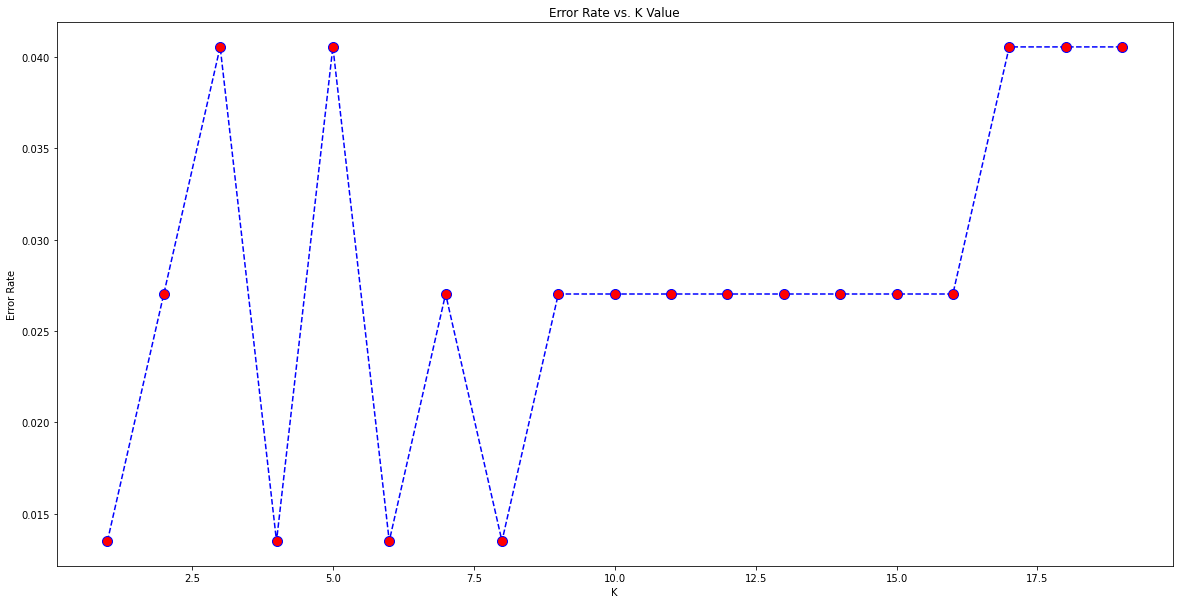

In [74]:
plt.figure(figsize=(20,10))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
knn_test = KNeighborsClassifier(n_neighbors=6)
knn_test.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [106]:
pred_knn = knn_test.predict(X_test)

In [107]:
accuracy_knn=accuracy_score(y_test,pred_knn)
accuracy_knn

0.9864864864864865

In [108]:
reportknn=classification_report(y_test, pred_knn)# it will give precision,recall,f1 scores and accuracy  
print(reportknn)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        16
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



#### We can see XGboost, SVM and Logistic Regression gave same result of 98.64% compare to Random Forest which gave accuracy of 95.94% and in KNN got accuracy of 98.64% when k = 6.

#### Pickling


In [70]:
import pickle
# open a file, where you ant to store the data
file_xgb = open('SkinDisorder_XGB_multiclassification.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file_xgb)